In [0]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset_X = []
    dataset_Y = []
    
    for i in range(len(seq) - window_size):
        subset = seq[i : (i + window_size + 1)]
        for si in range(len(subset) - 1):
            features = code2features(subset[si])
            dataset_X.append(features)
        dataset_Y.append([code2idx[subset[window_size]]])
    
    return np.array(dataset_X), np.array(dataset_Y)

# 속성 변환 함수
def code2features(code):
    features = []
    features.append(code2scale[code[0]] / float(max_scale_value))
    features.append(code2length[code[1]])
    return features

In [0]:
# 1. 데이터 준비하기

# 코드 사전 정의

code2scale = {'c':0, 'd':1, 'e':2, 'f':3, 'g':4, 'a':5, 'b':6}
code2length = {'4':0, '8':1}

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

max_scale_value = 6.0
    
# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [11]:
# 2. 데이터셋 생성하기

x_train, y_train = seq2dataset(seq, window_size = 4)
print('x_train 1 : ', x_train)
print('y_train 1 : ', y_train)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50 ,4, 2))
print('x_train 2 : ', x_train)

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)
print('y_train 2 : ', y_train)

one_hot_vec_size = y_train.shape[1]

print('one hot encoding vector size is ', one_hot_vec_size)

x_train 1 :  [[0.66666667 1.        ]
 [0.33333333 1.        ]
 [0.33333333 0.        ]
 [0.5        1.        ]
 [0.33333333 1.        ]
 [0.33333333 0.        ]
 [0.5        1.        ]
 [0.16666667 1.        ]
 [0.33333333 0.        ]
 [0.5        1.        ]
 [0.16666667 1.        ]
 [0.16666667 0.        ]
 [0.5        1.        ]
 [0.16666667 1.        ]
 [0.16666667 0.        ]
 [0.         1.        ]
 [0.16666667 1.        ]
 [0.16666667 0.        ]
 [0.         1.        ]
 [0.16666667 1.        ]
 [0.16666667 0.        ]
 [0.         1.        ]
 [0.16666667 1.        ]
 [0.33333333 1.        ]
 [0.         1.        ]
 [0.16666667 1.        ]
 [0.33333333 1.        ]
 [0.5        1.        ]
 [0.16666667 1.        ]
 [0.33333333 1.        ]
 [0.5        1.        ]
 [0.66666667 1.        ]
 [0.33333333 1.        ]
 [0.5        1.        ]
 [0.66666667 1.        ]
 [0.66666667 1.        ]
 [0.5        1.        ]
 [0.66666667 1.        ]
 [0.66666667 1.        ]
 [0.66666667

In [0]:
# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 2), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [0]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성
history.init()

for epoch_idx in range(num_epochs):
    print('epochs : ' + str(epoch_idx))
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False,
              callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 - 0s - loss: 0.0092 - accuracy: 1.0000
epochs : 334
Epoch 1/1
 - 0s - loss: 0.0084 - accuracy: 1.0000
epochs : 335
Epoch 1/1
 - 0s - loss: 0.0076 - accuracy: 1.0000
epochs : 336
Epoch 1/1
 - 0s - loss: 0.0070 - accuracy: 1.0000
epochs : 337
Epoch 1/1
 - 0s - loss: 0.0065 - accuracy: 1.0000
epochs : 338
Epoch 1/1
 - 0s - loss: 0.0060 - accuracy: 1.0000
epochs : 339
Epoch 1/1
 - 0s - loss: 0.0056 - accuracy: 1.0000
epochs : 340
Epoch 1/1
 - 0s - loss: 0.0052 - accuracy: 1.0000
epochs : 341
Epoch 1/1
 - 0s - loss: 0.0049 - accuracy: 1.0000
epochs : 342
Epoch 1/1
 - 0s - loss: 0.0046 - accuracy: 1.0000
epochs : 343
Epoch 1/1
 - 0s - loss: 0.0044 - accuracy: 1.0000
epochs : 344
Epoch 1/1
 - 0s - loss: 0.0041 - accuracy: 1.0000
epochs : 345
Epoch 1/1
 - 0s - loss: 0.0039 - accuracy: 1.0000
epochs : 346
Epoch 1/1
 - 0s - loss: 0.0037 - accuracy: 1.0000
epochs : 347
Epoch 1/1
 - 0s - loss: 0.0035 - accuracy: 1.0000
epochs : 348
Epoch 1/1
 - 0s - loss: 0.003

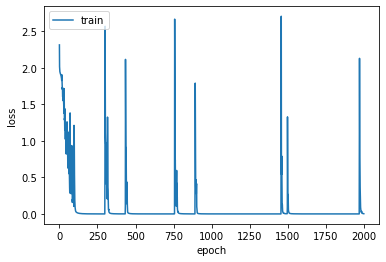

In [16]:
# 6. 학습과정 살펴보기
%matplotlib inline 
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [17]:
# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print('%s: %.2f%%' %(model.metrics_names[1], scores[1] * 100))
model.reset_states()

50/50 [==============================] - 0s 1ms/step
accuracy: 100.00%


In [0]:
# 8. 모델 사용하기
pred_count = 50 # 최대 예측 개수 정의

In [19]:
# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i])  # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out 는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

print('one step prediction : ', seq_out)

model.reset_states()

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [23]:
# 곡 전체 예측
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in

seq_in_features = []

for si in seq_in:
    features = code2features(si)
    seq_in_features.append(features)

for i in range(pred_count):
    sample_in = np.array(seq_in_features)
    sample_in = np.reshape(sample_in, (1, 4, 2)) # 샘플 수, 타임스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    
    features = code2features(idx2code[idx])
    seq_in_features.append(features)
    seq_in_features.pop(0)

model.reset_states()

print('full song prediction : ', seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
